In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('gordon_moore_law.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1]

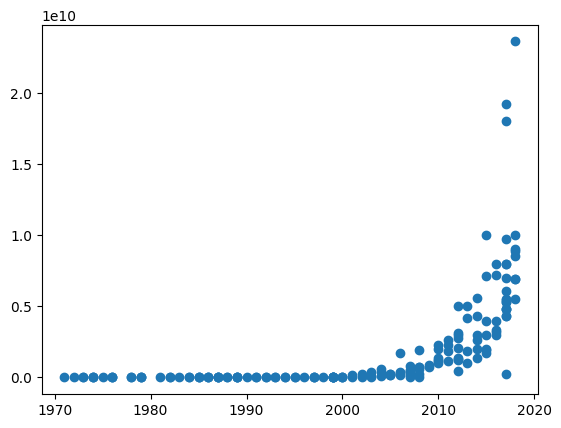

In [5]:
# Przedstaw dane na wykresie (są wykładnicze)
plt.scatter(X, Y)

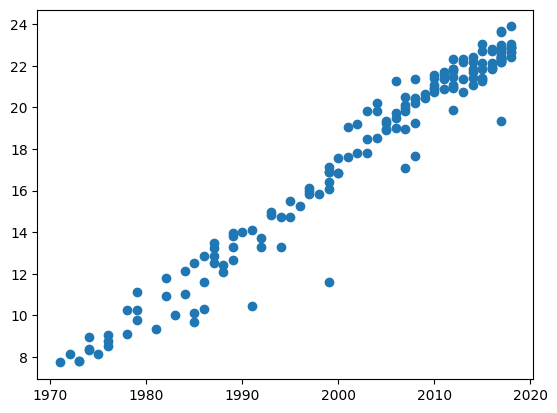

In [6]:
# Ponieważ chcemy mieć model liniowy, zmieniamy na logarytm
Y = np.log(Y)
plt.scatter(X, Y)

In [7]:
# Wyśrodkowanie danych X, aby wartości nie były zbyt duże
X = X - X.mean()

In [8]:
# Utwórz model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

# harmonogram tempa uczenia się
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001


scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


# Trenuj model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 664.3422 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 385.6889 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 280.6500 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 805.5207 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 596.7214 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 264.7499 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 149.7410 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 91.6457 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70.9315 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.7810 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 77.4090 - learning_rate: 0.0010
Epoch 12/200

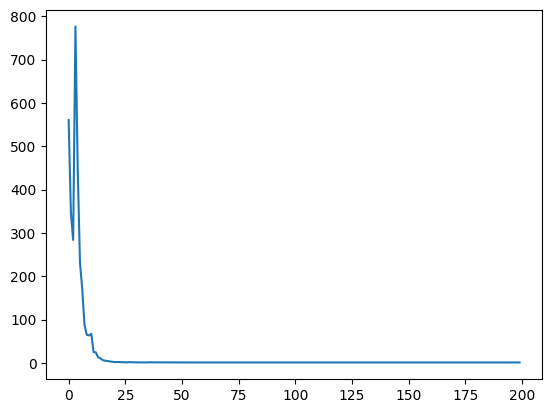

In [9]:
# Narysuj loss
plt.plot(r.history['loss'], label='loss')

In [10]:
# Uzyskaj nachylenie linii
# Nachylenie linii jest związane z szybkością podwajania liczby tranzystorów
print(model.layers) # Jest tylko 1 warstwa, warstwa Input się nie liczy
print(model.layers[0].get_weights())

[<Dense name=dense, built=True>]
[array([[0.33467308]], dtype=float32), array([17.75622], dtype=float32)]


In [11]:
# Nachylenie
a = model.layers[0].get_weights()[0][0,0]

In [12]:
print("Czas podwojenia", np.log(2) / a)

Czas podwojenia 2.0711172438684518


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


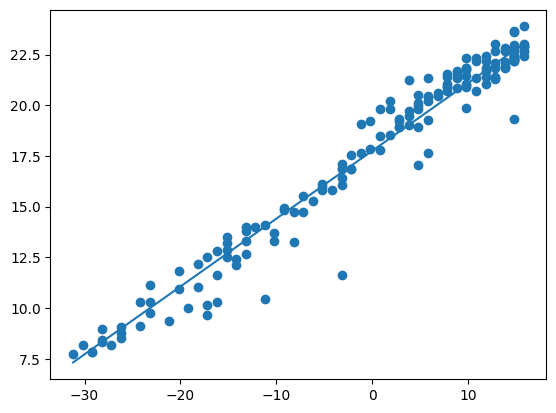

In [13]:
# Predykcja
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)